In [1]:
import numpy as np 
import pandas as pd 
import sqlite3 as sql
from sqlalchemy import create_engine
import csv 
import os 
import matplotlib.pyplot as plt

In [44]:
# importing csv from github 
malaria_deaths_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths.csv'
deaths_df = pd.read_csv(malaria_deaths_url)
deaths_df.rename({"Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)":"Deaths_per100000"}, axis=1, inplace = True)
#display(deaths_df.head())

malaria_deaths_age_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_deaths_age.csv'
deaths_age_df = pd.read_csv(malaria_deaths_age_url)
deaths_age_df.drop('Unnamed: 0', axis=1, inplace=True)
deaths_age_df.rename(columns={'entity' : 'Entity', 'code':'Code', 'year':"Year", "age_group":"Age_Group", 'deaths':"Deaths"}, inplace=True)
#display(deaths_age_df.head())

malaria_inc_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-13/malaria_inc.csv'
incidence_df = pd.read_csv(malaria_inc_url)
incidence_df.rename({"Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)":"Incidence_per1000"}, axis=1, inplace = True)
#display(incidence_df.head())

conn = sql.connect('malaria_database.db')
c = conn.cursor() 
deaths_df.to_sql('malaria_deaths', conn, if_exists='replace', index = False)
conn.commit()
deaths_age_df.to_sql('malaria_deaths_age', conn, if_exists='replace', index = False)
conn.commit()
incidence_df.to_sql('malaria_incidence', conn, if_exists='replace', index = False)
conn.commit()

## Nigeria accounts for 27 percent of malaria cases wouldwide and has the highest number of deaths. This case study shall zoom on malaria in Nigeria. 

In [45]:
#c.execute('''  SELECT Entity, Year, Deaths FROM malaria_deaths WHERE Entity = "Nigeria"''').fetchall()

Text(0, 0.5, 'Deaths per 100,000')

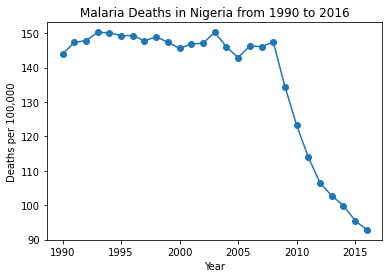

In [46]:
death_year_df = pd.DataFrame(c.execute('''  SELECT  Year, Deaths_per100000 FROM malaria_deaths WHERE Entity = "Nigeria"''').fetchall(), columns=['Year', 'Deaths'])    

plt.plot(death_year_df.iloc[:,0], death_year_df.iloc[:,1])
plt.scatter(death_year_df.iloc[:,0], death_year_df.iloc[:,1])
plt.title('Malaria Deaths in Nigeria from 1990 to 2016')
plt.xlabel('Year')
plt.ylabel('Deaths per 100,000')



Death rate due to Malaria seems to be decreasing at an exponential rate from 2008 to 2016 in Nigeria.

Text(0, 0.5, 'Incidence per 100,000')

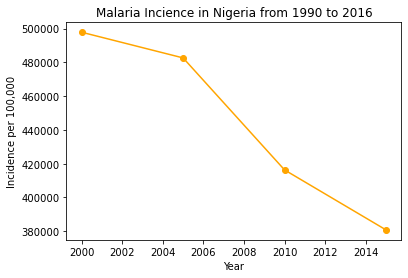

In [47]:
#c.execute(''' SELECT * FROM malaria_incidence WHERE Entity = "Nigeria"''').fetchall()
inc_year_df = pd.DataFrame(c.execute('''  SELECT  Year,Incidence_per1000 FROM malaria_incidence WHERE Entity = "Nigeria"''').fetchall(), columns=['Year', 'Incidence_per1000'])    
plt.plot(inc_year_df.iloc[:,0], inc_year_df.iloc[:,1] * 1000, color='orange')
plt.scatter(inc_year_df.iloc[:,0], inc_year_df.iloc[:,1] * 1000, color='orange')
plt.title('Malaria Incience in Nigeria from 1990 to 2016')
plt.xlabel('Year')
plt.ylabel('Incidence per 100,000')

Incidence of malaria in Nigeria showed a decreasing trend over 15 years. A regression line could be used to predict the malaria incidence in Nigeria today. 

Text(0.5, 1.0, 'Deaths per Age Catagory')

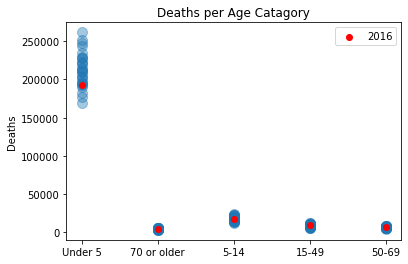

In [50]:
#c.execute('''  SELECT Entity, Year, Age_Group, Deaths FROM malaria_deaths_age WHERE Entity = "Nigeria" AND Year = 2016''').fetchall()

death_age_df = pd.DataFrame(c.execute('''  SELECT Entity, Year, Age_Group, Deaths FROM malaria_deaths_age WHERE Entity = "Nigeria" ''').fetchall(), columns=['Entity', 'Year', 'Age_Group', 'Deaths'])
plt.scatter(death_age_df.iloc[:,2], death_age_df.iloc[:,3], alpha=0.4, s=100)
death_age2016_df = pd.DataFrame(c.execute('''  SELECT Entity, Year, Age_Group, Deaths FROM malaria_deaths_age WHERE Entity = "Nigeria" AND Year = 2016''').fetchall(), columns=['Entity', 'Year', 'Age_Group', 'Deaths'])
plt.scatter(death_age2016_df.iloc[:,2], death_age2016_df.iloc[:,3], color='red', label='2016')

plt.legend() 
plt.ylabel('Deaths')
plt.title("Deaths per Age Catagory")


From the deaths per age catagory graph, we can tell that deaths from children below 5 are the main contributing factor to the high death rate from malaria in Nigeria. 